##  *Features_Engineering*

In [ ]:
%run C:\Users\Omar\Intern_Final_Project\notebooks\Data_Cleaning\Data_Preperation_and_expoloration.ipynb

---

### *A. <BR>Adding new features for Volume percentage for each country  ( multiplying price by each country's volume)*

In [25]:
for col in df:
    if col in ['brazil', 'india', 'vietnam', 'indonesia', 'china']:
        df[f"{col}_volume_percetntage"]=round(df[col]/df['total_volume'],2)

---

#### *B. <BR>Adding new features for total price by ( multiplying price by each country's volume)*

In [26]:
def total_price():
    for col in df:
        if col in ['total_volume', 'brazil', 'india', 'vietnam', 'indonesia','china']:
            df[f"{col}_total_price"]=round(df[col]*df["price"],2)


total_price()

In [27]:
df.head()

,price,total_volume,brazil,india,vietnam,indonesia,china,brazil_season,indonesia_season,india_season,...,india_volume_percetntage,vietnam_volume_percetntage,indonesia_volume_percetntage,china_volume_percetntage,total_volume_total_price,brazil_total_price,india_total_price,vietnam_total_price,indonesia_total_price,china_total_price
week_end_dt,,,,,,,,,,,,,,,,,,,,,
2016-01-03,6.599075,1596040.2,10793.5,65658.1,1519588.5,0.0,0.0,0,0,0,...,0.04,0.95,0.0,0.0,10532388.98,71227.12,433282.73,10027878.48,0.0,0.0
2016-01-03,7.175335,1596040.2,10793.5,65658.1,1519588.5,0.0,0.0,0,0,0,...,0.04,0.95,0.0,0.0,11452123.11,77446.98,471118.86,10903556.55,0.0,0.0
2016-01-03,7.300575,1596040.2,10793.5,65658.1,1519588.5,0.0,0.0,0,0,0,...,0.04,0.95,0.0,0.0,11652011.18,78798.76,479341.88,11093869.81,0.0,0.0
2016-01-10,7.379675,2295578.0,5677.8,15274.4,2274625.7,0.0,0.0,0,0,0,...,0.01,0.99,0.0,0.0,16940619.58,41900.32,112720.11,16785998.41,0.0,0.0
2016-01-10,7.175335,2295578.0,5677.8,15274.4,2274625.7,0.0,0.0,0,0,0,...,0.01,0.99,0.0,0.0,16471541.17,40740.12,109598.94,16321201.40,0.0,0.0


* *Additional insights*:<br>
* *After visualizing the new created features an seen below , we can can say:*<br>
1. *The total income gotted has litle increased over years*
2. *Veitnam has the highest income among other countries*
3. *Chinal has he lowest*

### *C. <br>Some Visualizations* 

<Axes: xlabel='week_end_dt'>

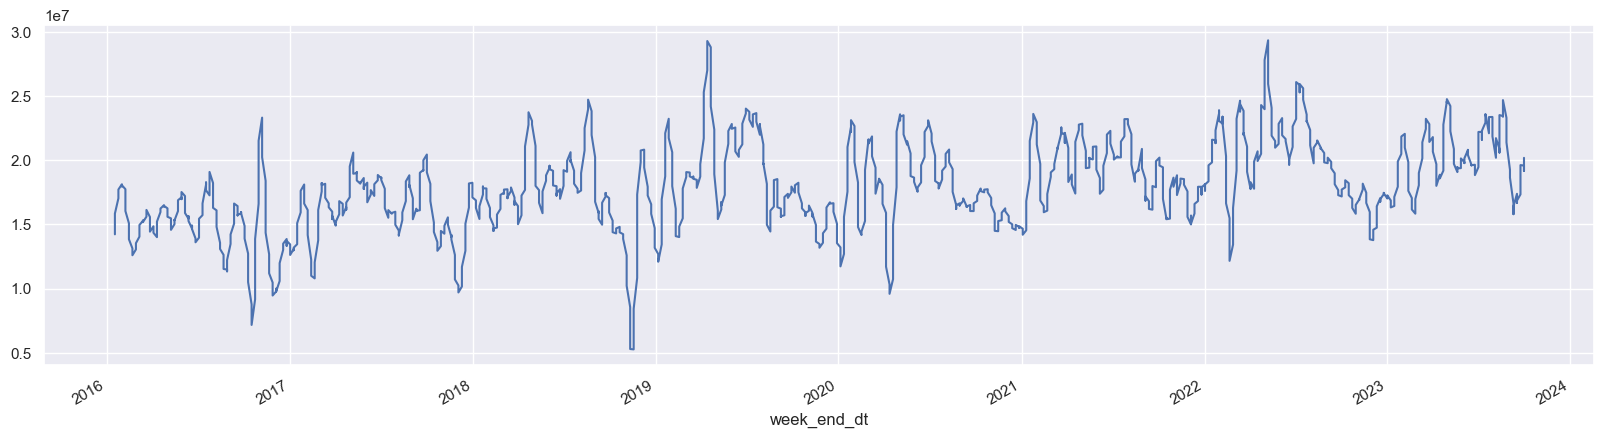

In [28]:
df["total_volume_total_price"].rolling(window=7).mean().plot(figsize=(20,5))

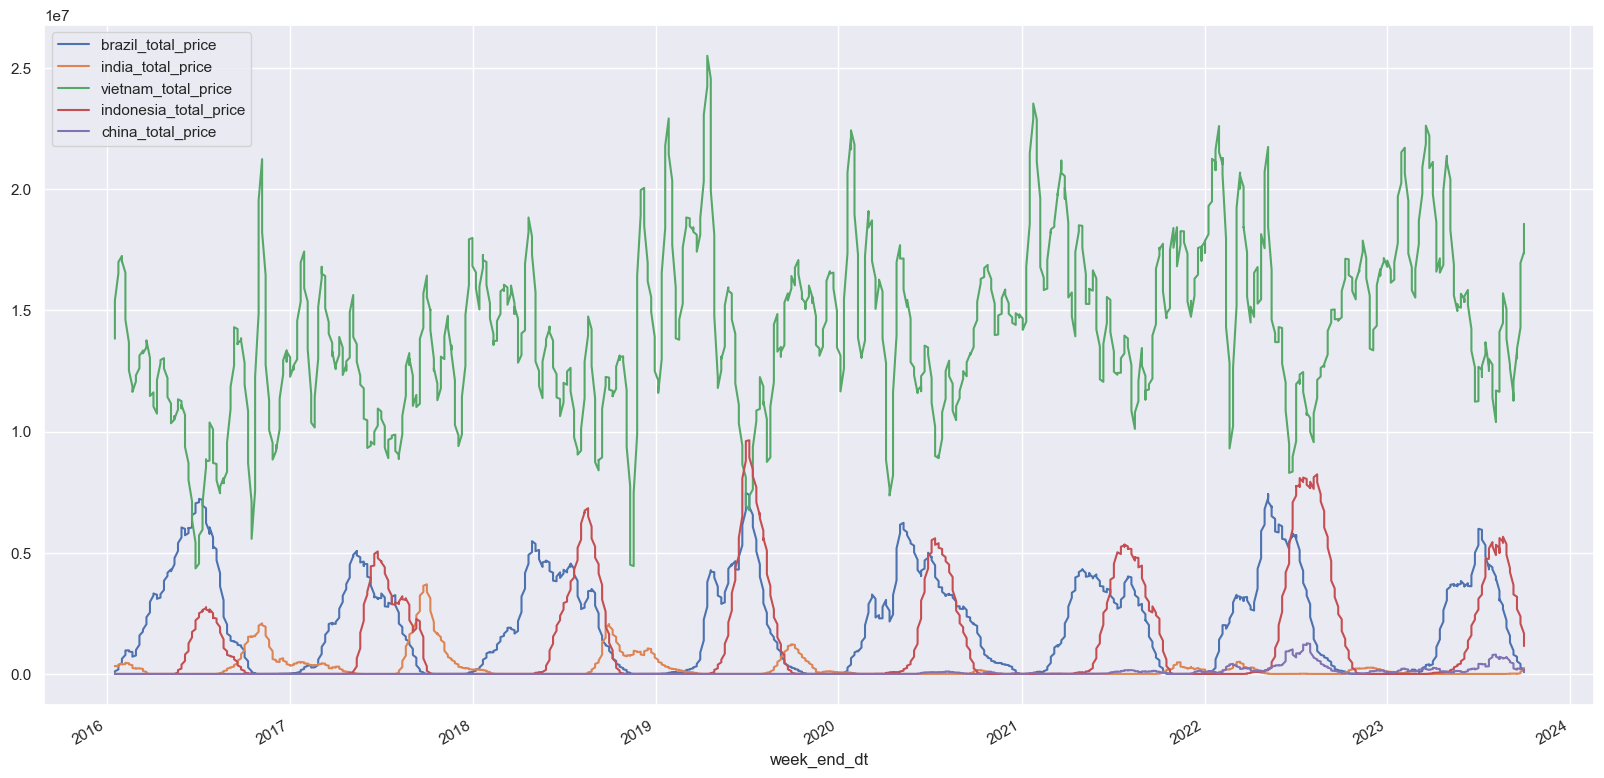

In [29]:
df[['brazil_total_price', 'india_total_price', 'vietnam_total_price','indonesia_total_price', 'china_total_price']].rolling(window=7).mean().plot();

---

## *D. <BR>Creating new 3 datasetes ,each dataset represent a specific color of the pepper*

In [30]:
df_red=df[df["red"]==1].drop(["red","yellow","green"],axis=1)
df_green=df[df["green"]==1].drop(["red","yellow","green"],axis=1)
df_yellow=df[df["yellow"]==1].drop(["red","yellow","green"],axis=1)

In [31]:
print(df_red.shape,df_green.shape,df_yellow.shape)

(405, 32) (405, 32) (405, 32)


* *Visualizing our new datasets*

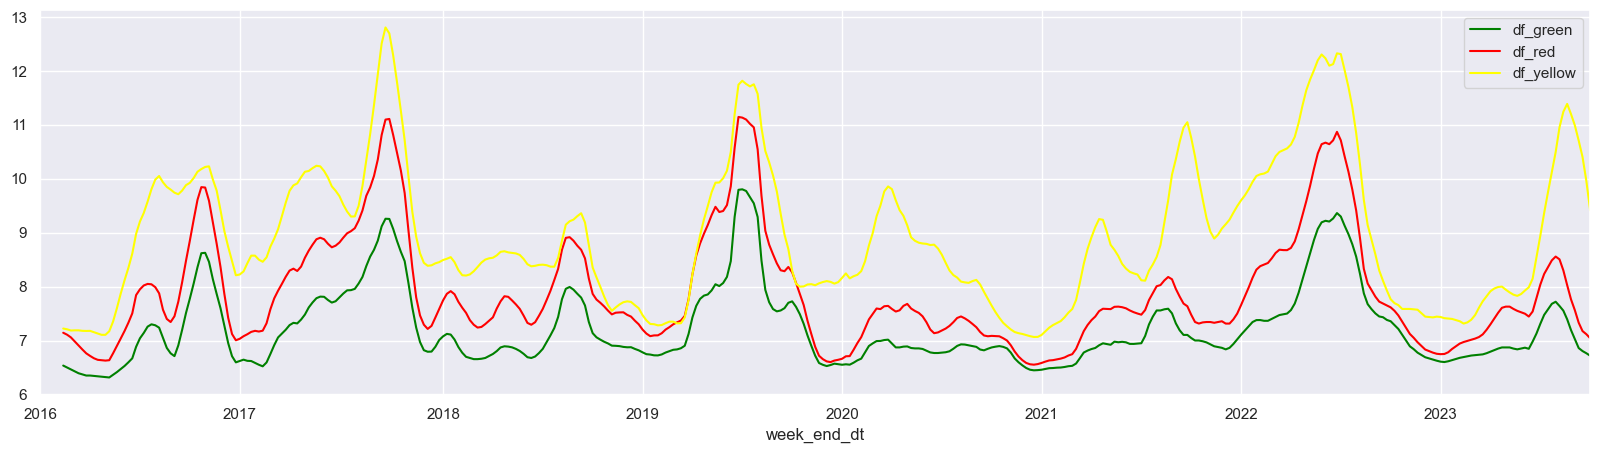

In [32]:
df_green["price"].rolling(window=7).mean().plot(figsize=(20,5),color="green");
df_red["price"].rolling(window=7).mean().plot(figsize=(20,5),color="red");
df_yellow["price"].rolling(window=7).mean().plot(figsize=(20,5),color="yellow");
plt.legend(["df_green","df_red","df_yellow"]);

* **Cleary we can see that yellow peppers has the highest price mean, followed by red peppers, and finally green peppers has the lowest pric mean*

---

### *E. <BR>Features Shifting*

* *Before starting , we will Concatenate the historical dataset and the projected dataset*

In [33]:
df2=pd.read_csv(r"C:\Users\Omar\Desktop\SiTeck\Month_1\Final_Project_data\projection_outside_supply.csv")
df2

,week_end_dt,brazil,india,vietnam,indonesia,china,brazil_season,indonesia_season,india_season,china_season,total_volume
0,2023-10-08,62609.9,0,2365023.5,27739.8,8678.3,False,False,True,False,2464051.7
1,2023-10-15,22744.0,0,2345998.8,15052.6,6508.7,False,False,True,False,2390304.2
2,2023-10-22,10961.5,0,2555267.6,0.0,15187.1,False,False,True,False,2581416.4
3,2023-10-29,9211.5,0,2530537.9,0.0,15187.1,False,False,True,False,2554936.6


* *Prepare the data before concatinating*


In [34]:
for col in df2:
    if col in ["brazil_season","indonesia_season","india_season","china_season"]:
        df2[col]=df2[col].apply(lambda x:1 if x is True else 0)
       

In [35]:
df2["week_end_dt"]=pd.to_datetime(df2["week_end_dt"]) 


In [36]:
df2.set_index("week_end_dt",inplace=True)


In [37]:
df_red=pd.concat([df_red,df2]).fillna(0)
df_green=pd.concat([df_green,df2]).fillna(0)
df_yellow=pd.concat([df_yellow,df2]).fillna(0)

* *since we are going to forecase the future 4 weeks , the min number of shifs will be 4,hence ;we will do shifting for 5,6 and 7 weeks ,alsong with rolling 2,4,6 and 7 as well to see the model performance*

In [38]:
shift=[4]
Roll_Window=[4]
def features_shift():       
    
        for col in df_red:
           for s in shift:
               for w in Roll_Window:
                  if col not in ["year","month","week"]:
                     df_red[f"{col}_shift_{s}_Rolling_{w}"]=df_red[col].rolling(window=w, min_periods=1).mean().shift(s)                   
                    
        for col in df_green:
           for s in shift:
               for w in Roll_Window:
                  if col not in ["year","month","week"]:
                     df_green[f"{col}_shift_{s}_Rolling_{w}"]=df_green[col].rolling(window=w, min_periods=1).mean().shift(s)                  
                   
        for col in df_yellow:
            for s in shift:
                for w in Roll_Window:
                  if col not in ["year","month","week"]:
                     df_yellow[f"{col}_shift_{s}_Rolling_{w}"]=df_yellow[col].rolling(window=w, min_periods=1).mean().shift(s)
                   
                   
                  
features_shift()
              


In [39]:
print(df_red.shape,df_green.shape,df_yellow.shape)

(409, 61) (409, 61) (409, 61)


In [40]:
df_green.dropna(axis=0,inplace=True)
df_red.dropna(axis=0,inplace=True)
df_yellow.dropna(axis=0,inplace=True)

In [41]:
features_to_drop=[    
       'jordan_max_price','jordan_min_price','demand','supply','year','month','week','brazil_volume_percetntage','india_volume_percetntage',
       'vietnam_volume_percetntage','indonesia_volume_percetntage','china_volume_percetntage','total_volume_total_price',
       'brazil_total_price','india_total_price','vietnam_total_price','indonesia_total_price','china_total_price']

In [42]:
def features_drop():
      
      df_red.drop(features_to_drop,axis=1,inplace=True)
      df_green.drop(features_to_drop,axis=1,inplace=True)    
      df_yellow.drop(features_to_drop,axis=1,inplace=True) 



features_drop()     

In [43]:
print(df_red.shape,df_green.shape,df_yellow.shape)

(405, 43) (405, 43) (405, 43)


In [44]:
df_red.head()

,price,total_volume,brazil,india,vietnam,indonesia,china,brazil_season,indonesia_season,india_season,...,india_volume_percetntage_shift_4_Rolling_4,vietnam_volume_percetntage_shift_4_Rolling_4,indonesia_volume_percetntage_shift_4_Rolling_4,china_volume_percetntage_shift_4_Rolling_4,total_volume_total_price_shift_4_Rolling_4,brazil_total_price_shift_4_Rolling_4,india_total_price_shift_4_Rolling_4,vietnam_total_price_shift_4_Rolling_4,indonesia_total_price_shift_4_Rolling_4,china_total_price_shift_4_Rolling_4
week_end_dt,,,,,,,,,,,,,,,,,,,,,
2016-01-31,7.175335,2503155.4,115289.9,57268.7,2330596.7,0.0,0.0,0,0,0,...,0.040000,0.950000,0.0,0.0,1.145212e+07,77446.9800,471118.860000,1.090356e+07,0.0,0.0
2016-02-07,7.144825,1930968.2,181222.3,79730.1,1670015.7,0.0,0.0,0,0,0,...,0.025000,0.970000,0.0,0.0,1.396183e+07,59093.5500,290358.900000,1.361238e+07,0.0,0.0
2016-02-14,6.985495,1896731.2,92421.4,33788.0,1770521.8,0.0,0.0,0,0,0,...,0.026667,0.966667,0.0,0.0,1.509168e+07,103320.7600,366331.226667,1.462203e+07,0.0,0.0
2016-02-21,6.924475,1798854.9,93660.2,25153.1,1680041.5,0.0,0.0,0,0,0,...,0.025000,0.962500,0.0,0.0,1.629554e+07,230930.4450,366516.650000,1.569809e+07,0.0,0.0
2016-02-28,6.825035,2178384.1,211996.1,42386.6,1924001.4,0.0,0.0,0,0,0,...,0.020000,0.957500,0.0,0.0,1.792276e+07,418379.6125,351467.462500,1.715291e+07,0.0,0.0


In [45]:
df_green.head()

,price,total_volume,brazil,india,vietnam,indonesia,china,brazil_season,indonesia_season,india_season,...,india_volume_percetntage_shift_4_Rolling_4,vietnam_volume_percetntage_shift_4_Rolling_4,indonesia_volume_percetntage_shift_4_Rolling_4,china_volume_percetntage_shift_4_Rolling_4,total_volume_total_price_shift_4_Rolling_4,brazil_total_price_shift_4_Rolling_4,india_total_price_shift_4_Rolling_4,vietnam_total_price_shift_4_Rolling_4,indonesia_total_price_shift_4_Rolling_4,china_total_price_shift_4_Rolling_4
week_end_dt,,,,,,,,,,,,,,,,,,,,,
2016-01-31,6.499635,2503155.4,115289.9,57268.7,2330596.7,0.0,0.0,0,0,0,...,0.040000,0.950000,0.0,0.0,1.053239e+07,71227.120000,433282.730000,1.002788e+07,0.0,0.0
2016-02-07,6.499635,1930968.2,181222.3,79730.1,1670015.7,0.0,0.0,0,0,0,...,0.025000,0.970000,0.0,0.0,1.284054e+07,54347.675000,267039.820000,1.251915e+07,0.0,0.0
2016-02-14,6.349345,1896731.2,92421.4,33788.0,1770521.8,0.0,0.0,0,0,0,...,0.026667,0.966667,0.0,0.0,1.387965e+07,95022.943333,336910.716667,1.344771e+07,0.0,0.0
2016-02-21,6.349345,1798854.9,93660.2,25153.1,1680041.5,0.0,0.0,0,0,0,...,0.025000,0.962500,0.0,0.0,1.498683e+07,212384.137500,337081.247500,1.443736e+07,0.0,0.0
2016-02-28,6.349345,2178384.1,211996.1,42386.6,1924001.4,0.0,0.0,0,0,0,...,0.020000,0.957500,0.0,0.0,1.642113e+07,381912.925000,321816.977500,1.571740e+07,0.0,0.0


In [46]:
df_yellow.head()

,price,total_volume,brazil,india,vietnam,indonesia,china,brazil_season,indonesia_season,india_season,...,india_volume_percetntage_shift_4_Rolling_4,vietnam_volume_percetntage_shift_4_Rolling_4,indonesia_volume_percetntage_shift_4_Rolling_4,china_volume_percetntage_shift_4_Rolling_4,total_volume_total_price_shift_4_Rolling_4,brazil_total_price_shift_4_Rolling_4,india_total_price_shift_4_Rolling_4,vietnam_total_price_shift_4_Rolling_4,indonesia_total_price_shift_4_Rolling_4,china_total_price_shift_4_Rolling_4
week_end_dt,,,,,,,,,,,,,,,,,,,,,
2016-01-31,7.200005,2503155.4,115289.9,57268.7,2330596.7,0.0,0.0,0,0,0,...,0.040000,0.950000,0.0,0.0,1.165201e+07,78798.760,479341.880000,1.109387e+07,0.0,0.0
2016-02-07,7.150285,1930968.2,181222.3,79730.1,1670015.7,0.0,0.0,0,0,0,...,0.025000,0.970000,0.0,0.0,1.429632e+07,60349.540,296030.995000,1.393993e+07,0.0,0.0
2016-02-14,7.125425,1896731.2,92421.4,33788.0,1770521.8,0.0,0.0,0,0,0,...,0.026667,0.966667,0.0,0.0,1.533455e+07,104377.870,370706.596667,1.485947e+07,0.0,0.0
2016-02-21,7.200005,1798854.9,93660.2,25153.1,1680041.5,0.0,0.0,0,0,0,...,0.025000,0.962500,0.0,0.0,1.649481e+07,232250.830,370113.692500,1.589244e+07,0.0,0.0
2016-02-28,7.220345,2178384.1,211996.1,42386.6,1924001.4,0.0,0.0,0,0,0,...,0.020000,0.957500,0.0,0.0,1.808749e+07,420073.105,353361.955000,1.731405e+07,0.0,0.0
